In [217]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(1097, 729, 3)

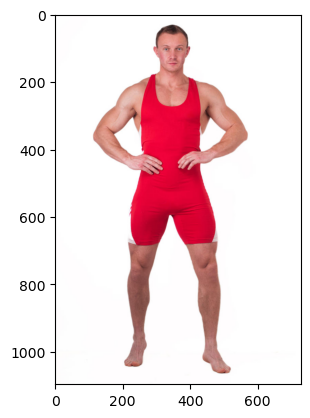

In [218]:
image = cv2.imread('skin6.jpg')
plt.imshow(image[...,::-1]);
image.shape

(3, 1097, 729)


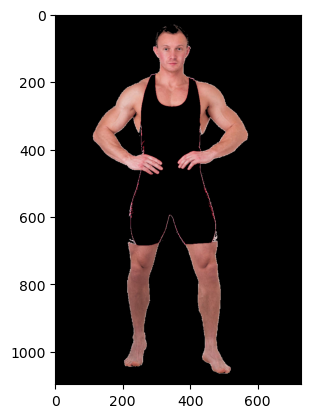

In [219]:
B,G,R = cv2.split(image)
BGR_condition = np.where((B>20)&\
                (G>40)&\
                (R>95)&\
                (R>G) &\
                (R>B) &\
                ((R-G)>15)\
                ,[B,G,R],0
               )
print(BGR_condition.shape)
BGR_result = np.moveaxis(BGR_condition,0,-1)
plt.imshow(BGR_result[...,::-1]);
BGR_mask = np.where(BGR_result == [0,0,0] , 0,255).astype(np.uint8)
BGR_mask = BGR_mask[...,0]

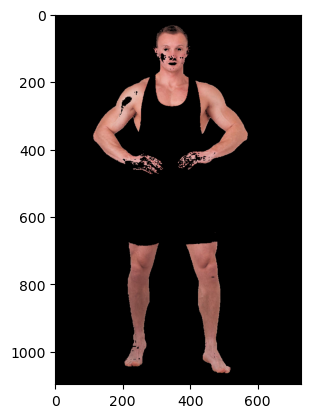

In [220]:
image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
hsv_mask = cv2.inRange(image_hsv,(0,58,0),(50,173,255))
HSV_result = cv2.bitwise_and(image,image,mask = hsv_mask)
plt.imshow(HSV_result[...,::-1])

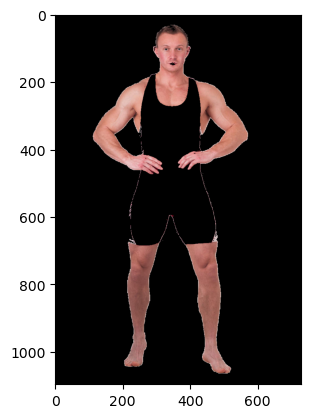

In [221]:
image_YCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb)
YCrCb_mask = cv2.inRange(image_YCrCb,(0,135,85),(255,180,135))
YCrCb_result = cv2.bitwise_and(image,image,mask = YCrCb_mask)
plt.imshow(YCrCb_result[...,::-1])

(3, 1097, 729)


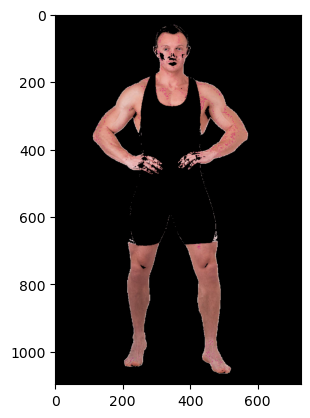

In [222]:
image_YCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb)
y,cr,cb = cv2.split(image_YCrCb)
YCrCb_condition = np.where((cr>135) &\
                (cb>85) &\
                (y>80) &\
                (cr <= ((1.5862*cb)+20)) &\
                (cr >= ((0.3448*cb)+76.2069)) &\
                (cr >= ((-4.5652*cb)+234.5652)) &\
                (cr <= ((-1.15*cb)+301.75)) &\
                (cr <= ((-2.2857*cb)+432.85))\
                ,[y,cr,cb],0
               )
print(YCrCb_condition.shape)
YCrCb_result = np.moveaxis(YCrCb_condition,0,-1)
YCrCb_BGR = cv2.cvtColor(last5,cv2.COLOR_YCrCb2BGR)
Result = np.where(last6==[0,135,0] ,0, last6)
plt.imshow(Result[...,::-1]);